# CUPED

Variance reduction approach using CUPED (covariates using pre-experimental data)

In [26]:
import warnings
warnings.filterwarnings('ignore')

import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

sys.path.append('../')

from abacus.auto_ab.abtest import ABTest
from abacus.auto_ab.params import ABTestParams
from abacus.auto_ab.params import DataParams, HypothesisParams

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Case: no difference between groups

In [27]:
df = pd.read_csv('./data/ab_data.csv')
df.head()

,height_now,height_prev,weight_now,weight_prev,noise_now,noise_prev,groups,id,moda_city,country,numerator,denominator,conversion
0,172.470442,166.382868,163.648256,173.422115,5.644384,-1.923929,A,0,3,2,3,2,1
1,178.610565,173.386388,173.195935,180.831845,11.664751,2.711829,B,1,2,2,1,4,1
2,180.382301,178.563579,174.520065,181.571024,7.183178,-0.453939,A,2,3,1,2,2,1
3,180.954018,179.732080,175.731245,182.840388,-4.682656,6.358723,B,3,4,1,3,2,0
4,167.590042,167.684244,166.109779,170.189261,9.134517,-1.153977,B,4,2,1,3,2,1


In [32]:
data_params = DataParams(
    id_col='id', 
    group_col='groups',
    control_name='A',
    treatment_name='B',
    target='height_now', 
    covariate='height_prev', 
    is_grouped=True
)

hypothesis_params = HypothesisParams(
    alpha=0.05, 
    beta=0.2, 
    alternative='greater',  
    metric_type='continuous', 
    metric_name='mean',
)

ab_params = ABTestParams(data_params, hypothesis_params)

In [34]:
ab_test = ABTest(df, ab_params)

In [35]:
print('Control mean = {:.3f}'.format(np.mean(ab_test.params.data_params.control)))
print('Treatment mean = {:.3f}'.format(np.mean(ab_test.params.data_params.treatment)))
print('Control var = {:.3f}'.format(np.var(ab_test.params.data_params.control)))
print('Treatment var = {:.3f}'.format(np.var(ab_test.params.data_params.treatment)))

Control mean = 174.990
Treatment mean = 175.000
Control var = 24.972
Treatment var = 24.900


In [36]:
ab_test1 = ab_test.cuped()

In [37]:
print('Control mean = {:.3f}'.format(np.mean(ab_test1.params.data_params.control)))
print('Treatment mean = {:.3f}'.format(np.mean(ab_test1.params.data_params.treatment)))
print('Control var = {:.3f}'.format(np.var(ab_test1.params.data_params.control)))
print('Treatment var = {:.3f}'.format(np.var(ab_test1.params.data_params.treatment)))

Control mean = 174.990
Treatment mean = 175.000
Control var = 3.417
Treatment var = 3.428


In [40]:
print(f"bootstrap_test: {ab_test.test_boot_confint()}")
print(f"mannwhitney_test: {ab_test.test_mannwhitney()}")
print(f"welch_test: {ab_test.test_welch()}")

bootstrap_test: {'stat': None, 'p-value': 0.6969045008079264, 'result': 0}
mannwhitney_test: {'stat': 4992976857.0, 'p-value': 0.7054512378789, 'result': 0}
welch_test: {'stat': 0.4435517988023507, 'p-value': 0.3286835705749809, 'result': 0}


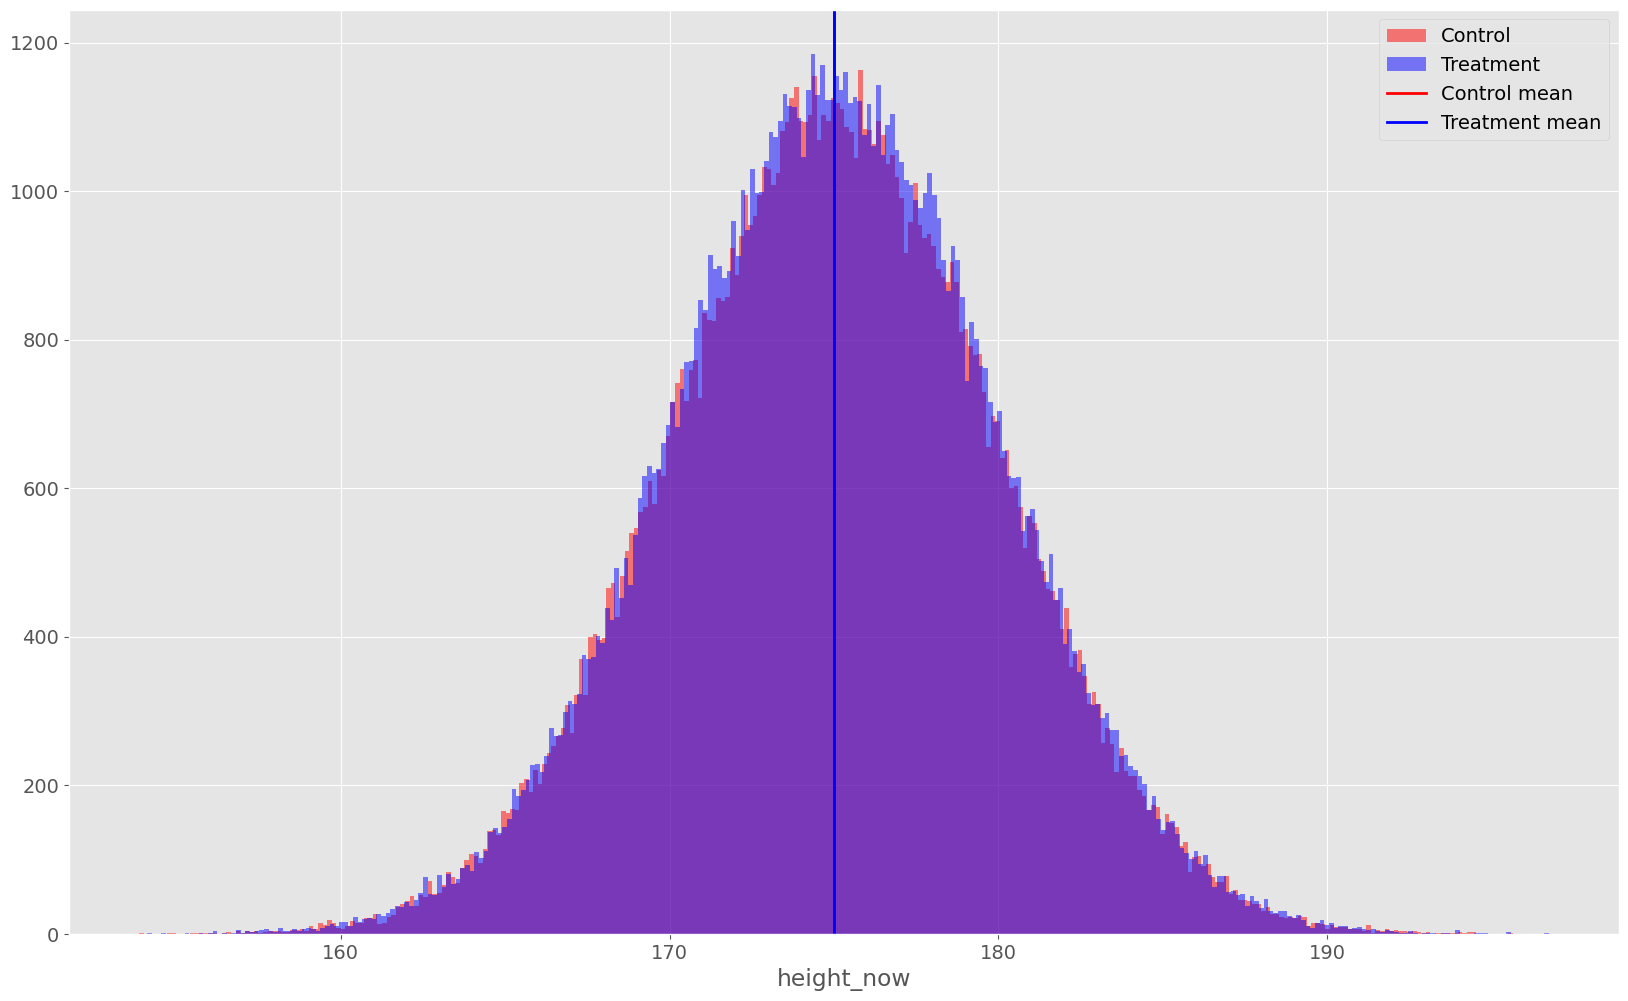

In [56]:
ab_test.plot()

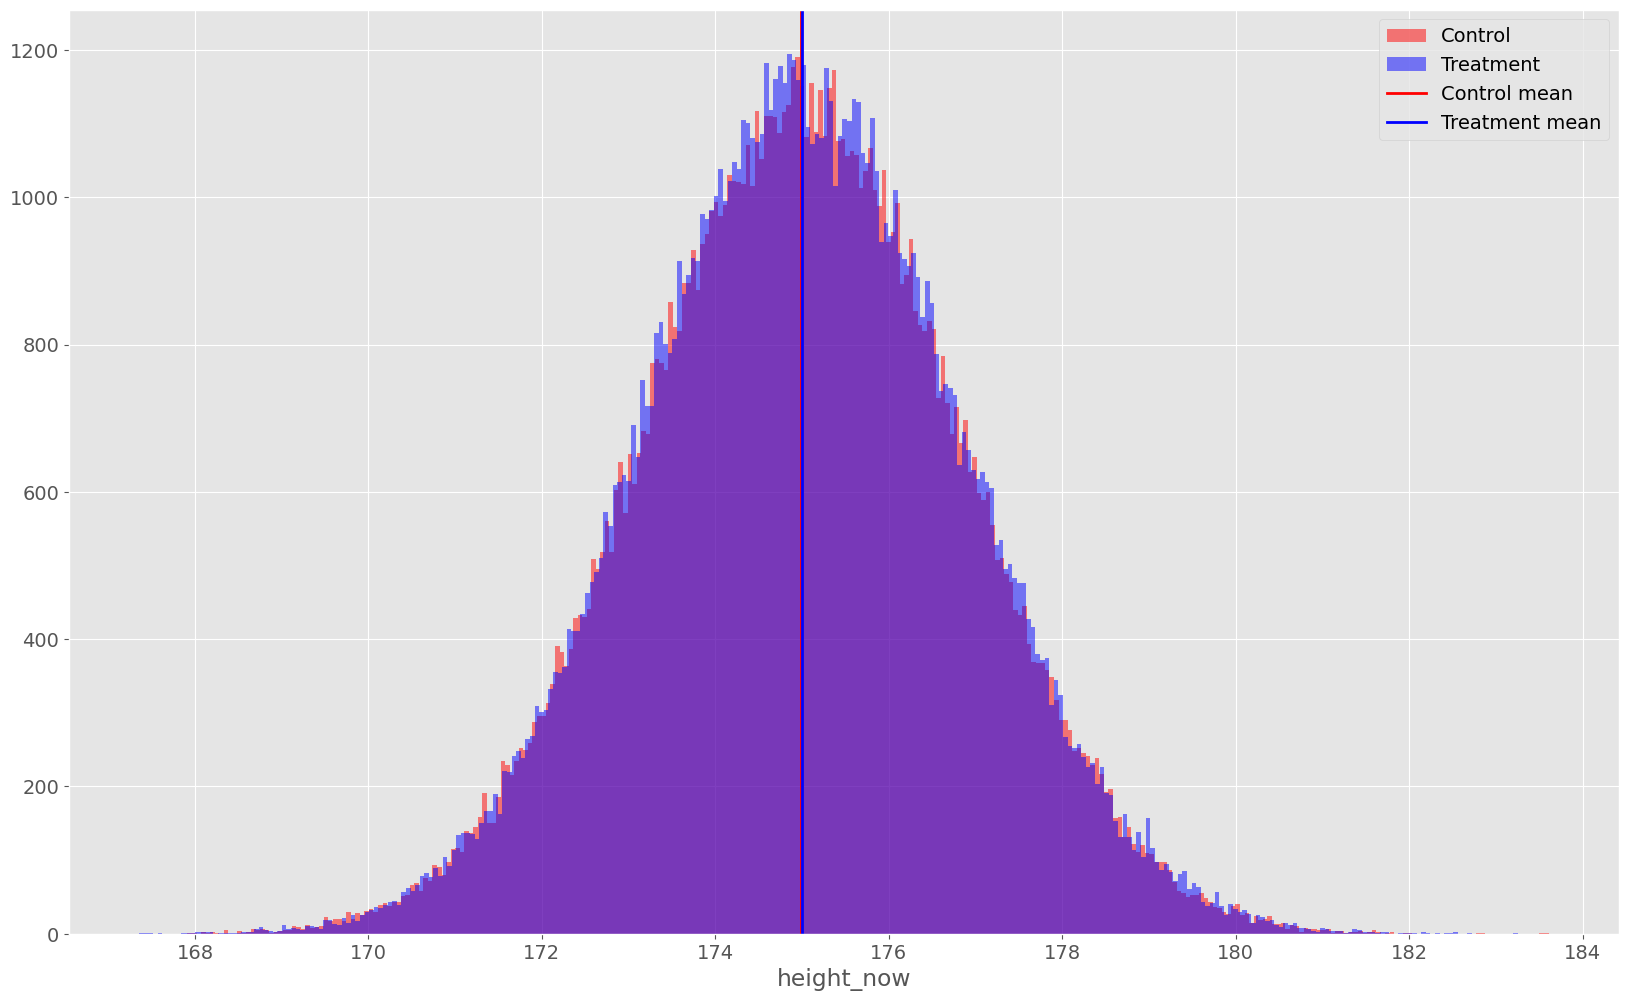

In [57]:
ab_test1.plot()

## Case: differences between groups

### Increase values of one group

In [98]:
df = pd.read_csv('./data/ab_data.csv')

incs = np.sort(np.random.uniform(0.0, 2, df.shape[0]))
df['height_now'].where(df['groups'] == 'A',
                                    df['height_now'] + incs, 
                                    axis=0,
                                    inplace=True)

In [88]:
df.head()

,height_now,height_prev,weight_now,weight_prev,noise_now,noise_prev,groups,id,moda_city,country,numerator,denominator,conversion
0,172.470442,166.382868,163.648256,173.422115,5.644384,-1.923929,A,0,3,2,3,2,1
1,178.610595,173.386388,173.195935,180.831845,11.664751,2.711829,B,1,2,2,1,4,1
2,180.382301,178.563579,174.520065,181.571024,7.183178,-0.453939,A,2,3,1,2,2,1
3,180.954062,179.732080,175.731245,182.840388,-4.682656,6.358723,B,3,4,1,3,2,0
4,167.590096,167.684244,166.109779,170.189261,9.134517,-1.153977,B,4,2,1,3,2,1


In [89]:
data_params = DataParams(
    id_col='id', 
    group_col='groups',
    control_name='A',
    treatment_name='B',
    target='height_now', 
    covariate='height_prev', 
    is_grouped=True
)

hypothesis_params = HypothesisParams(
    alpha=0.05, 
    beta=0.2, 
    alternative='greater',  
    metric_type='continuous', 
    metric_name='mean',
)

ab_params = ABTestParams(data_params, hypothesis_params)

In [90]:
ab_test = ABTest(df, ab_params)

In [91]:
print('Control mean = {:.3f}'.format(np.mean(ab_test.params.data_params.control)))
print('Treatment mean = {:.3f}'.format(np.mean(ab_test.params.data_params.treatment)))
print('Control var = {:.3f}'.format(np.var(ab_test.params.data_params.control)))
print('Treatment var = {:.3f}'.format(np.var(ab_test.params.data_params.treatment)))

Control mean = 174.990
Treatment mean = 175.998
Control var = 24.972
Treatment var = 25.253


In [92]:
print(f"bootstrap_test: {ab_test.test_boot_confint()}")
print(f"mannwhitney_test: {ab_test.test_mannwhitney()}")
print(f"welch_test: {ab_test.test_welch()}")

bootstrap_test: {'stat': None, 'p-value': 1.0, 'result': 1}
mannwhitney_test: {'stat': 4432530837.0, 'p-value': 1.0, 'result': 0}
welch_test: {'stat': 45.00304325145506, 'p-value': 0.0, 'result': 1}


In [93]:
ab_test1 = ab_test.cuped()

In [94]:
print('Control mean = {:.3f}'.format(np.mean(ab_test1.params.data_params.control)))
print('Treatment mean = {:.3f}'.format(np.mean(ab_test1.params.data_params.treatment)))
print('Control var = {:.3f}'.format(np.var(ab_test1.params.data_params.control)))
print('Treatment var = {:.3f}'.format(np.var(ab_test1.params.data_params.treatment)))

Control mean = 174.990
Treatment mean = 175.998
Control var = 3.417
Treatment var = 3.761


In [95]:
print(f"bootstrap_test: {ab_test.test_boot_confint()}")
print(f"mannwhitney_test: {ab_test.test_mannwhitney()}")
print(f"welch_test: {ab_test.test_welch()}")

bootstrap_test: {'stat': None, 'p-value': 1.0, 'result': 1}
mannwhitney_test: {'stat': 4432530837.0, 'p-value': 1.0, 'result': 0}
welch_test: {'stat': 45.00304325145506, 'p-value': 0.0, 'result': 1}


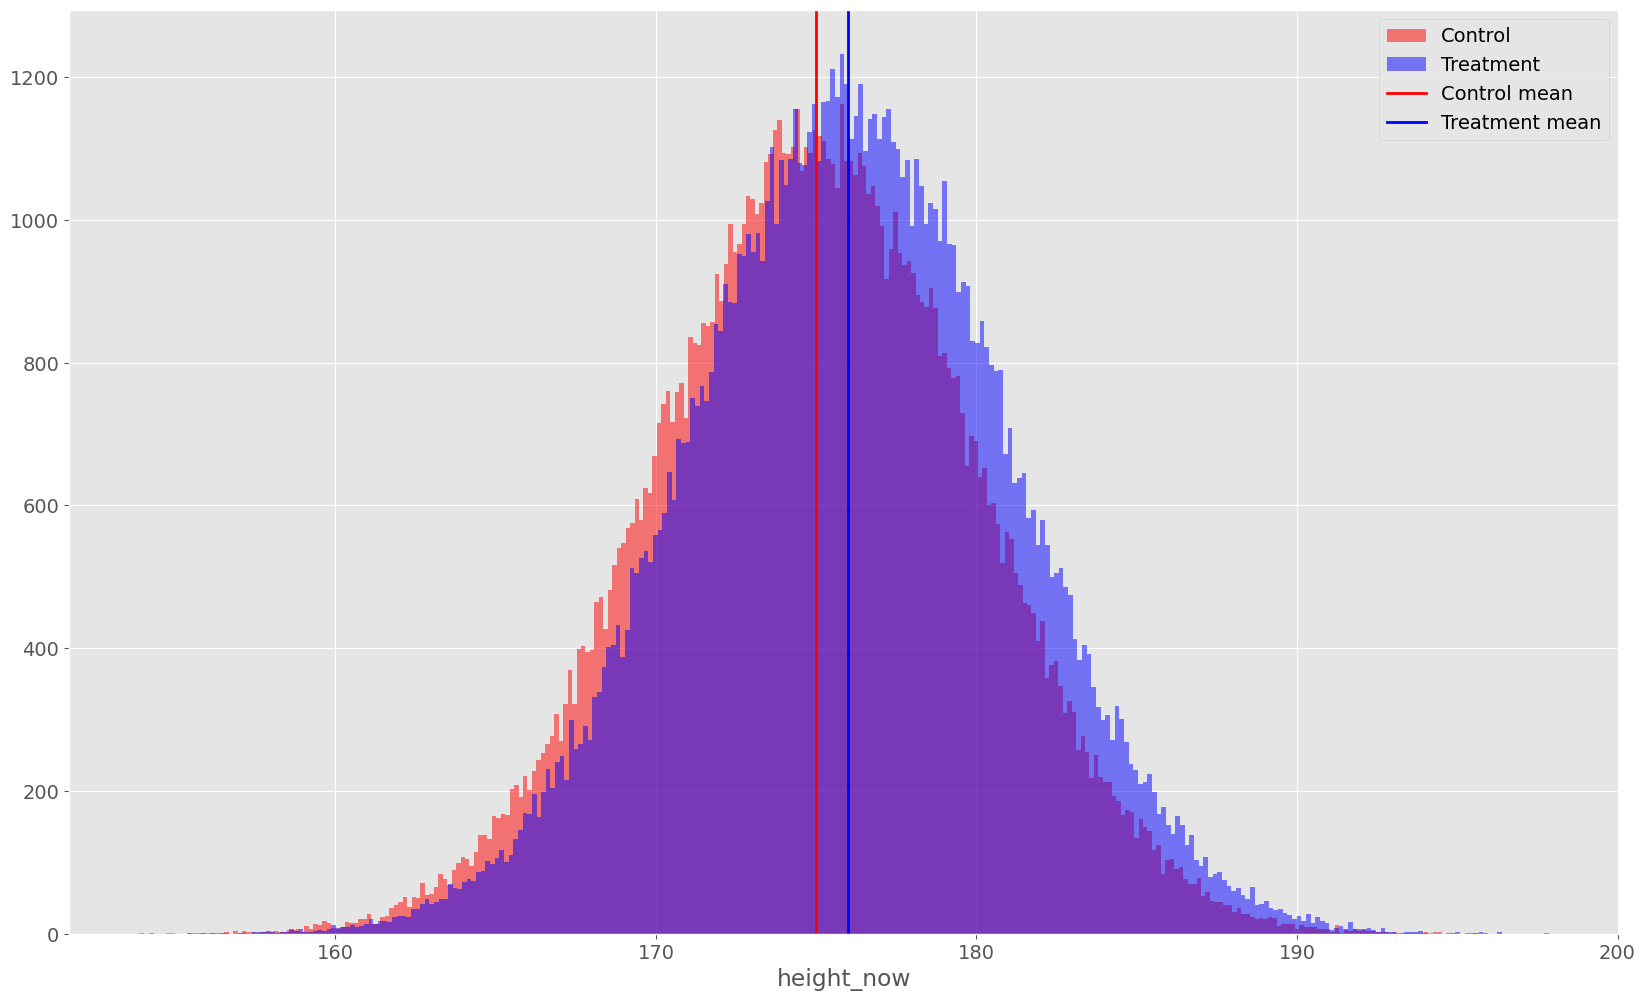

In [96]:
ab_test.plot()

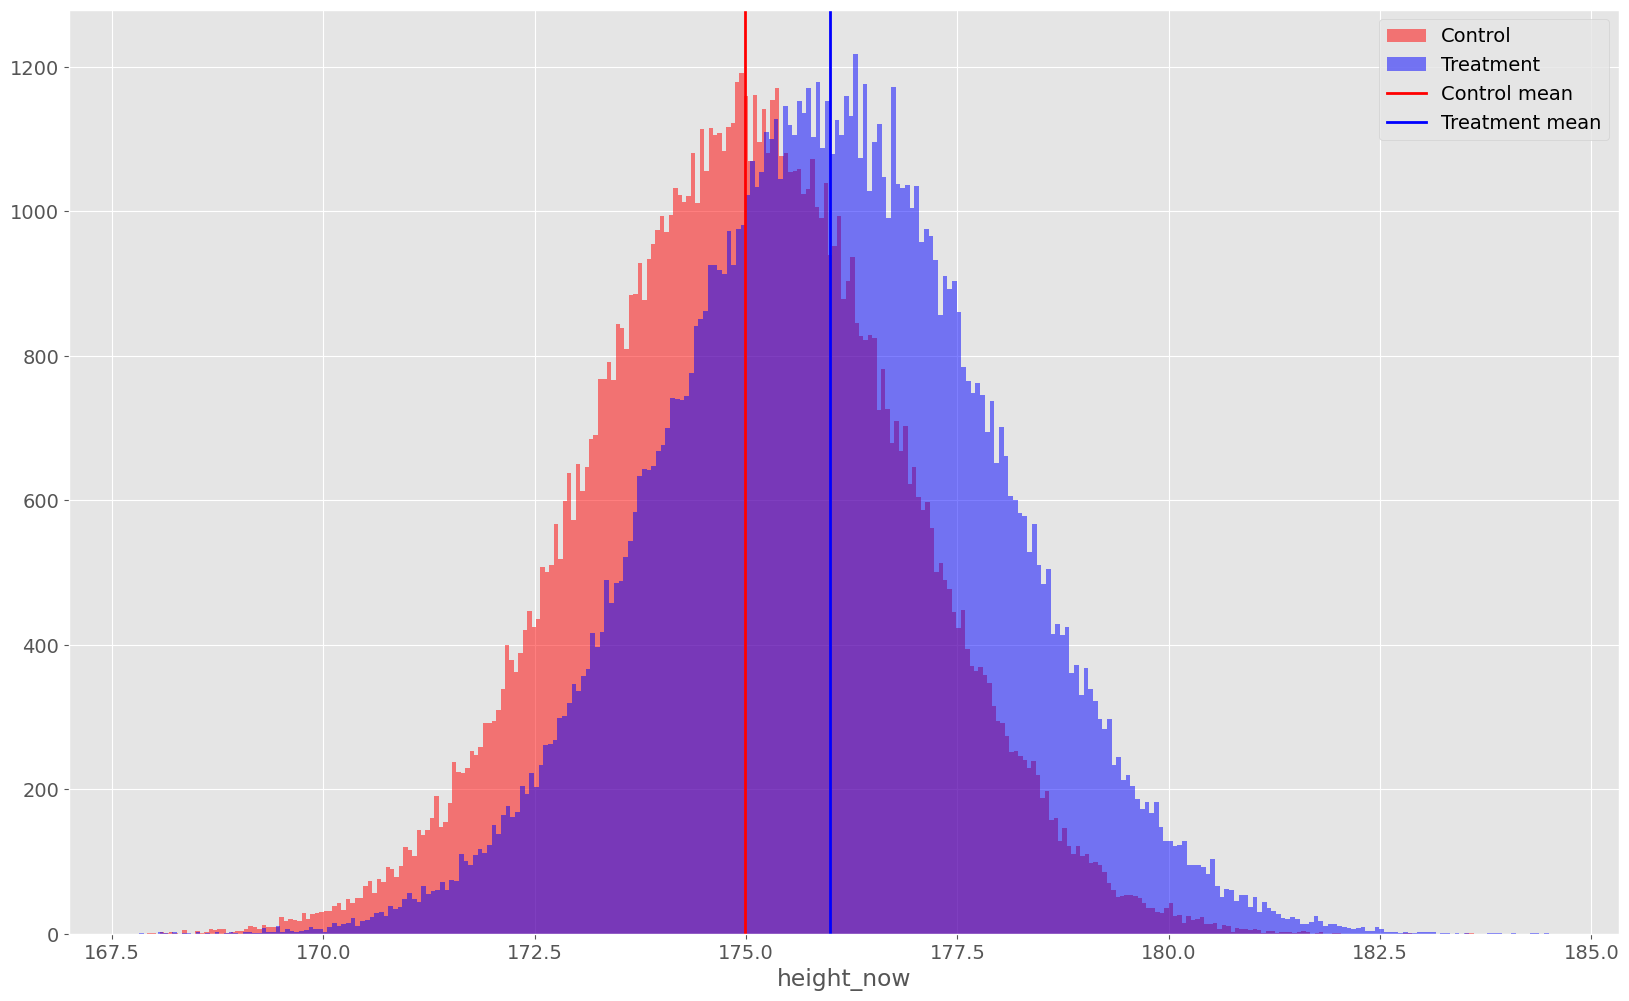

In [97]:
ab_test1.plot()